# UNEMPLOYMENT ANALYSIS IN INDIA

## Problem Statement:
India faces significant unemployment challenges, with variations across states and regions. We have seen a sharp increase in the unemployment rate during Covid-19. This project aims to analyze unemployment trends using state-wise data to identify key patterns and regional disparities. The objective is to provide insights into the factors affecting unemployment and labor participation rates.

In [16]:
# Importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline

In [100]:
# Reading Dataset
df = pd.read_csv('Unemployment in India Dataset.csv')

In [10]:
df.head()


,States,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region,longitude,latitude
0,Andhra Pradesh,29-02-2020,Monthly,5.91,11723617,42.83,Rural,15.9129,79.7400
1,Assam,29-02-2020,Monthly,3.26,8462814,40.17,Rural,26.2006,92.9376
2,Bihar,29-02-2020,Monthly,9.61,23168192,37.28,Rural,25.0961,85.3131
3,Chhattisgarh,29-02-2020,Monthly,7.89,6847173,45.05,Rural,21.2787,81.8661
4,Delhi,29-02-2020,Monthly,13.81,147500,35.84,Rural,28.7041,77.1025


In [12]:
df.tail()


,States,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region,longitude,latitude
1002,West Bengal,30-06-2020,Monthly,7.29,30726310,40.39,East,22.9868,87.855
1003,West Bengal,31-07-2020,Monthly,6.83,35372506,46.17,East,22.9868,87.855
1004,West Bengal,31-08-2020,Monthly,14.87,33298644,47.48,East,22.9868,87.855
1005,West Bengal,30-09-2020,Monthly,9.35,35707239,47.73,East,22.9868,87.855
1006,West Bengal,31-10-2020,Monthly,9.98,33962549,45.63,East,22.9868,87.855


In [18]:
df.shape

(1007, 9)

Dataset has 1007 rows and 9 columns

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   States                                    1007 non-null   object 
 1    Date                                     1007 non-null   object 
 2    Frequency                                1007 non-null   object 
 3    Estimated Unemployment Rate (%)          1007 non-null   float64
 4    Estimated Employed                       1007 non-null   int64  
 5    Estimated Labour Participation Rate (%)  1007 non-null   float64
 6   Region                                    1007 non-null   object 
 7   longitude                                 1007 non-null   float64
 8   latitude                                  1007 non-null   float64
dtypes: float64(4), int64(1), object(4)
memory usage: 70.9+ KB


In [22]:
#Checking for null percentage

round(df.isnull().sum()/df.shape[0]*100,2)

States                                      0.0
 Date                                       0.0
 Frequency                                  0.0
 Estimated Unemployment Rate (%)            0.0
 Estimated Employed                         0.0
 Estimated Labour Participation Rate (%)    0.0
Region                                      0.0
longitude                                   0.0
latitude                                    0.0
dtype: float64

In [24]:
# Delecting the null rows

df.dropna(inplace = True)

df.shape

(1007, 9)

In [26]:
# We shall rename the columns for easier access
df = df.rename(columns={' Date' : 'Date',' Frequency': 'Frequency' ,' Estimated Unemployment Rate (%)' : 'Est_Unemp_Rate', ' Estimated Employed' : 'Est_Emp_Rate',
                          ' Estimated Labour Participation Rate (%)' : 'Est_Labour_Rate'}).reset_index(drop = True)


# Rounding estimated employed column for a better visualizing

df['Est_Emp_Rate'] = round((df['Est_Emp_Rate']/1000000),2)

df.head()

,States,Date,Frequency,Est_Unemp_Rate,Est_Emp_Rate,Est_Labour_Rate,Region,longitude,latitude
0,Andhra Pradesh,29-02-2020,Monthly,5.91,11.72,42.83,Rural,15.9129,79.7400
1,Assam,29-02-2020,Monthly,3.26,8.46,40.17,Rural,26.2006,92.9376
2,Bihar,29-02-2020,Monthly,9.61,23.17,37.28,Rural,25.0961,85.3131
3,Chhattisgarh,29-02-2020,Monthly,7.89,6.85,45.05,Rural,21.2787,81.8661
4,Delhi,29-02-2020,Monthly,13.81,0.15,35.84,Rural,28.7041,77.1025


In [28]:
# Changing the dtype of 'Date' column

df['Date'] = pd.to_datetime(df['Date'])

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   States           1007 non-null   object        
 1   Date             1007 non-null   datetime64[ns]
 2   Frequency        1007 non-null   object        
 3   Est_Unemp_Rate   1007 non-null   float64       
 4   Est_Emp_Rate     1007 non-null   float64       
 5   Est_Labour_Rate  1007 non-null   float64       
 6   Region           1007 non-null   object        
 7   longitude        1007 non-null   float64       
 8   latitude         1007 non-null   float64       
dtypes: datetime64[ns](1), float64(5), object(3)
memory usage: 70.9+ KB


C:\Users\Admin\AppData\Local\Temp\ipykernel_11356\332904334.py:3: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


In [30]:
#checking if there are no duplicate rows in the data set 

df.duplicated().sum()

0

In [32]:
# Important to note that there is a typo in the 'Frequency' column

df.Frequency.value_counts()

Frequency
Monthly     648
 Monthly    359
Name: count, dtype: int64

In [34]:
df.columns

Index(['States', 'Date', 'Frequency', 'Est_Unemp_Rate', 'Est_Emp_Rate',
       'Est_Labour_Rate', 'Region', 'longitude', 'latitude'],
      dtype='object')

Since both the values represent the same thing and there is only typo error we can delete the Frequency column as it is insignificant for our analysis.

In [36]:
df = df.drop(['Frequency'],axis = 1)

df.shape

(1007, 8)

In [38]:
#We shall create a new column for year and month to analyse the between 2019 and 2020

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df.head()

,States,Date,Est_Unemp_Rate,Est_Emp_Rate,Est_Labour_Rate,Region,longitude,latitude,Year,Month
0,Andhra Pradesh,2020-02-29,5.91,11.72,42.83,Rural,15.9129,79.7400,2020,2
1,Assam,2020-02-29,3.26,8.46,40.17,Rural,26.2006,92.9376,2020,2
2,Bihar,2020-02-29,9.61,23.17,37.28,Rural,25.0961,85.3131,2020,2
3,Chhattisgarh,2020-02-29,7.89,6.85,45.05,Rural,21.2787,81.8661,2020,2
4,Delhi,2020-02-29,13.81,0.15,35.84,Rural,28.7041,77.1025,2020,2


Now there are 8 columns in the data set to be analyzed.

In [46]:
#Analysing the Region column

df.Region.value_counts(normalize = True)*100

Region
Urban        37.835154
Rural        35.650447
North         7.845084
South         5.958292
West          4.965243
East          3.972195
Northeast     3.773585
Name: proportion, dtype: float64

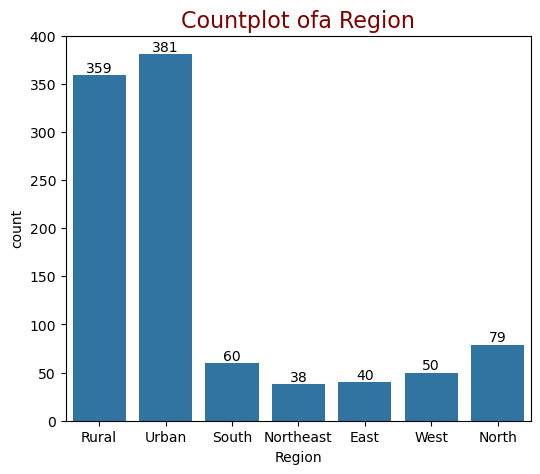

In [48]:
plt.figure(figsize = [6,5])
ax = sns.countplot(data = df, x = 'Region')

plt.title("Countplot ofa Region", fontdict={'fontsize': 16, 'fontweight' : 12, 'color' : 'Maroon'})
for x in ax.containers:
        ax.bar_label(x,rotation=0)

plt.show()

We have Maximum data from Rural and Urban Areas. Also we should note the Urban areas have high unemployment rate as compared to other areas.

In [58]:
#Analyzing the States column
df.States.value_counts()

States
Andhra Pradesh      38
Kerala              38
West Bengal         38
Uttar Pradesh       38
Tripura             38
Telangana           38
Tamil Nadu          38
Rajasthan           38
Punjab              38
Odisha              38
Madhya Pradesh      38
Maharashtra         38
Karnataka           38
Jharkhand           38
Himachal Pradesh    38
Haryana             38
Gujarat             38
Delhi               38
Chhattisgarh        38
Bihar               38
Meghalaya           37
Uttarakhand         37
Assam               36
Puducherry          36
Goa                 34
Jammu & Kashmir     30
Sikkim              25
Chandigarh          12
Name: count, dtype: int64

C:\Users\Admin\AppData\Local\Temp\ipykernel_11356\2098210434.py:3: UserWarning: 
The palette list has fewer values (2) than needed (7) and will cycle, which may produce an uninterpretable plot.
  ax = sns.countplot( x=df['States'],hue = df['Region'], palette = ['orange','lightgreen'] )


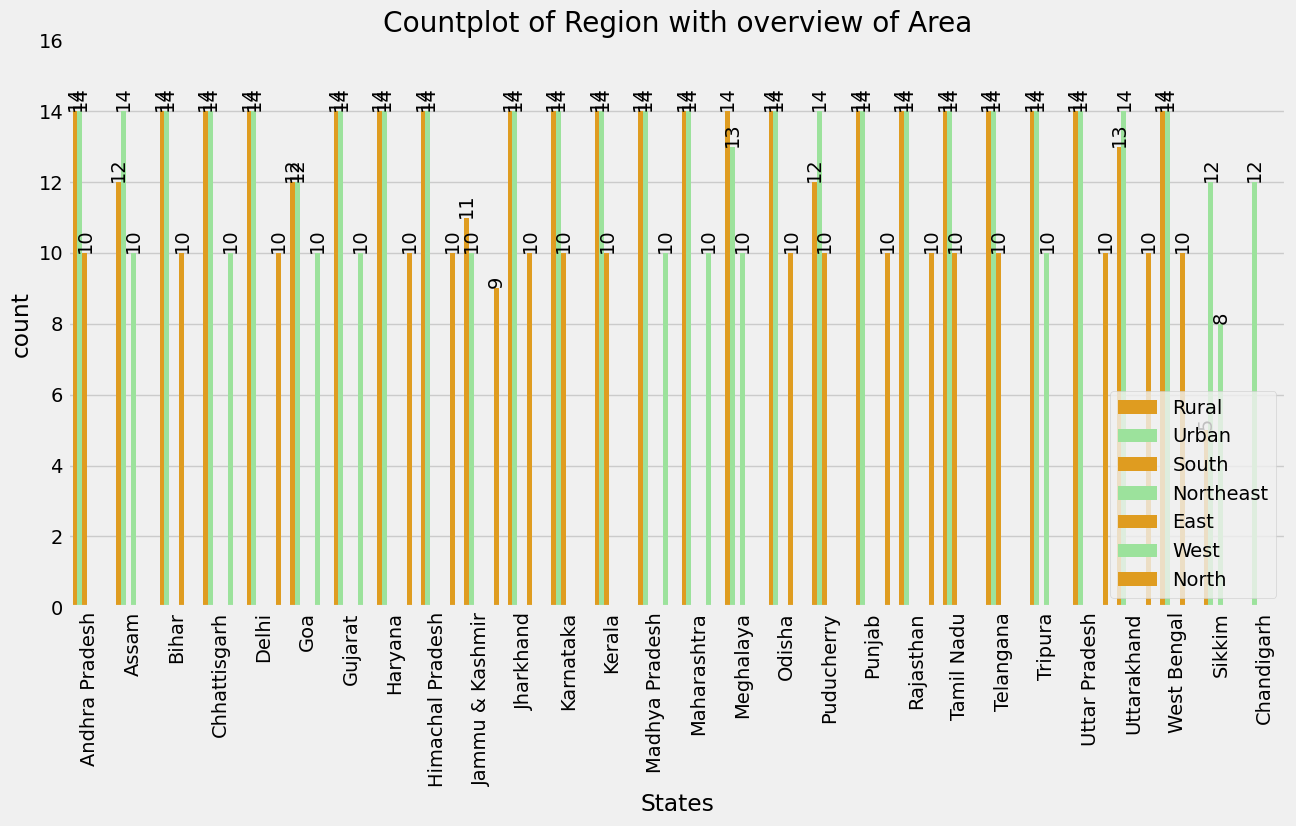

In [64]:
plt.figure(figsize=(14,7))
plt.style.use('fivethirtyeight')
ax = sns.countplot( x=df['States'],hue = df['Region'], palette = ['orange','lightgreen'] )
plt.legend(loc = 'lower right')

for x in ax.containers:
        ax.bar_label(x,rotation=90)
        
plt.xticks(rotation=90)
plt.ylim(0,16)
plt.title('Countplot of Region with overview of Area')
plt.show()

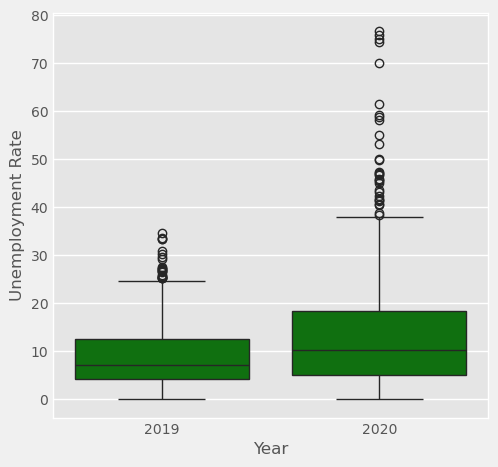

In [66]:
#Analysing the Unemployment Rate column
plt.figure(figsize=(5,5))
plt.style.use('ggplot')
sns.boxplot(y = df['Est_Unemp_Rate'], x = df['Year'], color ='green')
plt.ylabel('Unemployment Rate')
plt.show()

There are no outliers. Due to Covid-19 pandemic, there was sudden increase in the Unemployment Rate in 2020 due to Lockdown.

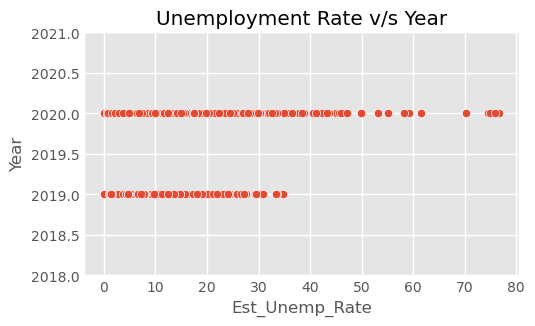

In [68]:
plt.figure(figsize=(5,3))
plt.style.use('ggplot')
sns.scatterplot(x = df['Est_Unemp_Rate'], y = df['Year'])
plt.ylim(2018,2021)
plt.title('Unemployment Rate v/s Year')
plt.show()

We can clearly see that in 2020 there was an increase in the unemployment rate after the rise of Covid-19.

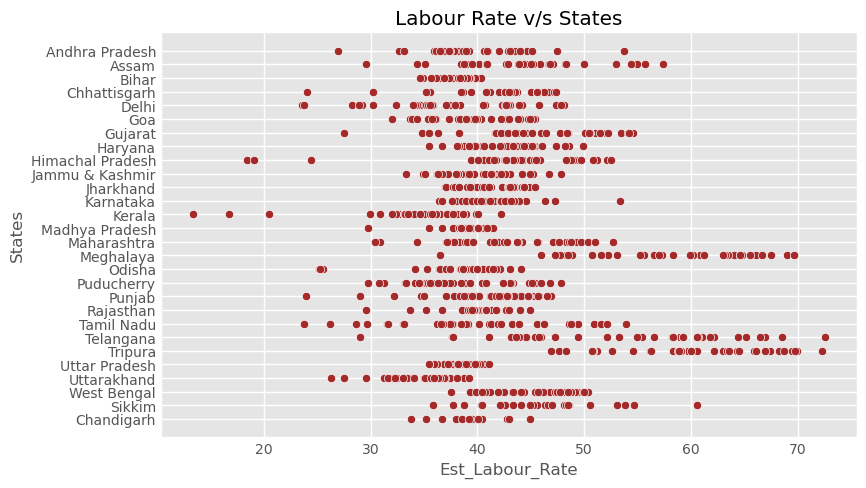

In [72]:
plt.figure(figsize=(8,5))
plt.style.use('ggplot')
sns.scatterplot(x = df['Est_Labour_Rate'], y = df['States'], color = 'brown')
plt.title('Labour Rate v/s States')
plt.show()

Meghalaya, Tripura and Telangana have high Labour rate.

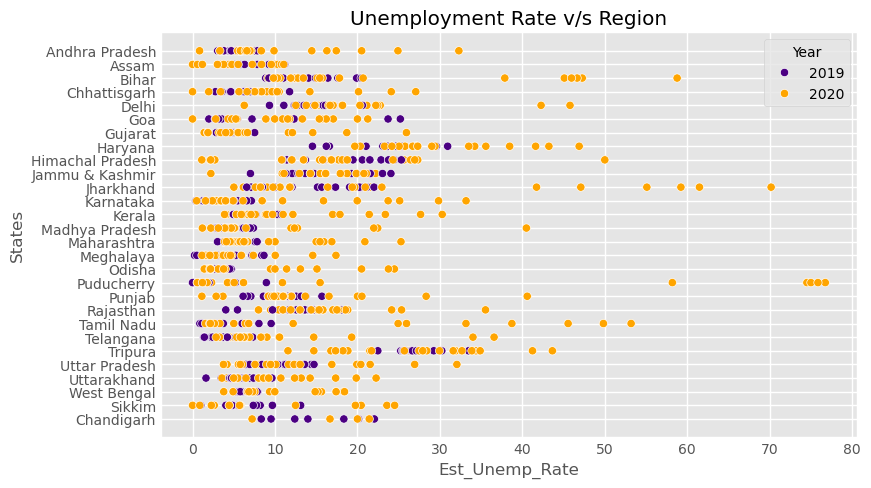

In [76]:
plt.figure(figsize=(8,5))
plt.style.use('ggplot')
sns.scatterplot(x = df['Est_Unemp_Rate'], y = df['States'], hue = df['Year'], palette =['indigo','orange'])
plt.title('Unemployment Rate v/s Region')
plt.show()

In 2019, unemployment rate was less as compared to 2020. Also in Puducherry,Jharkhand, Bihar the unemployement rate increased in 2020 due to pandemic.

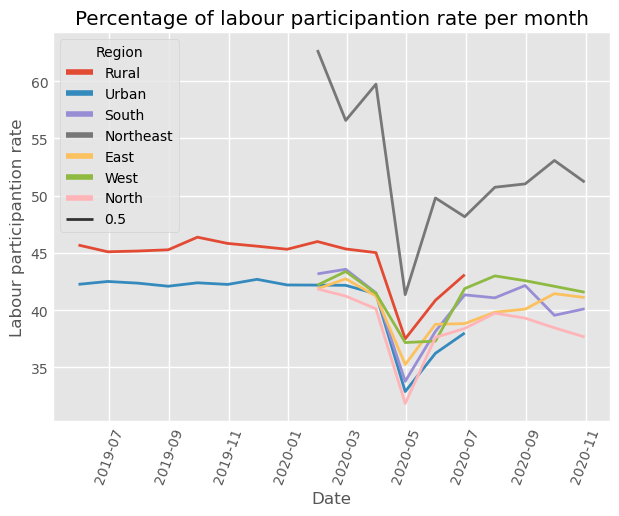

In [98]:
sns.lineplot(data=df, x='Date', y='Est_Labour_Rate', hue='Region', errorbar= None, size = 0.5)
plt.title('Percentage of labour participantion rate per month')
plt.ylabel('Labour participantion rate')
plt.xticks(rotation= 70)
plt.show()

The graph shows a steep decline in the labour partcipation during the time when pandemic was at its peak in Urban & Rular areas. But in Urban areas there is a much degradation than in rural areas.

## Conclusion:
This project analyzed unemployment trends in India, revealing significant regional and state-wise disparities. The findings highlight key differences between rural and urban areas, offering valuable insights for policymakers. The analysis provides a foundation for targeted interventions to reduce unemployment and improve labor participation across the country.